##### See, i have already done the EDA and Visulaization in my previous notebook,so you can refere to the same if you want to see the data analysis part. Below is the link given for the same- https://github.com/ashu5436/Internship/blob/main/Malignant%20Comment%20Classifier/MALIGNANT%20COMMENTS%20CLASSIFICATION.ipynb
##### Hence in this notebook i will be using deep NLP techniques to find the malignant comment classifier as comment is in the form of Text, also there are two datasets given intially; one is for model building and other is to test the unseen data from the same model. Here i've tried to append the both the dataset but since our dataset is too large hence i'll be using both simultaneously.

In [1]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the train dataset
df_train=pd.read_csv('C:\\Users\\Admin\\Desktop\\Malignant-Comments-Classifier\\Malignant Comments Classifier Project\\train.csv')
df_train

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [3]:
#Importing the test dataset
#test_csv has only two attributes except the target variable 'malignant' and their comment type
df_test=pd.read_csv('C:\\Users\\Admin\\Desktop\\Malignant-Comments-Classifier\\Malignant Comments Classifier Project\\test.csv')
df_test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [4]:
#appending the both datasets
df=df_train.append(df_test)
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0.0,0.0,0.0,0.0,0.0,0.0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0.0,0.0,0.0,0.0,0.0,0.0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0.0,0.0,0.0,0.0,0.0,0.0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0.0,0.0,0.0,0.0,0.0,0.0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",NaN,NaN,NaN,NaN,NaN,NaN
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,NaN,NaN,NaN,NaN,NaN,NaN
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",NaN,NaN,NaN,NaN,NaN,NaN
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
#droped other columns as i'm needed only one feature and one target variable
df.drop(['id','highly_malignant','rude','threat','abuse','loathe'],axis=1,inplace=True)
df.head()

,comment_text,malignant
0,Explanation\nWhy the edits made under my usern...,0.0
1,D'aww! He matches this background colour I'm s...,0.0
2,"Hey man, I'm really not trying to edit war. It...",0.0
3,"""\nMore\nI can't make any real suggestions on ...",0.0
4,"You, sir, are my hero. Any chance you remember...",0.0


### Using Deep-NLP Technique
### Data cleaning and Text-Preprocessing

In [5]:
!pip install tensorflow

In [76]:
import tensorflow as tf
print('\n',tf.__version__)


 2.11.0


In [7]:
#importing the libraries for neural network and LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [8]:
import nltk #nlp library for ML
import re #regular expression
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
stopwords.words('english') #displaying the stopwords of english

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [10]:
from nltk.corpus import stopwords           ###stopwords          
from nltk.stem.porter import PorterStemmer  ###stemming
ps=PorterStemmer()

### Text preprocessing

In [26]:
%%time
corpus=[]
for i in range(0,len(df)):
    review=re.sub('[^a-zA-Z]', ' ',str(df_train['comment_text'][i]))  #removing all the special character from the sentences except lower and upper case alphabets
    review.lower() #lowering each sentences
    review.split() #spliting
    
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')] #using stemming so that each word gets some related words that could not be meaningful and we are ignoring the words that are in stopwords.words('english')
    review=''.join(review) #joining
    corpus.append(review)   #appending the list
corpus #here i've got the corpus for all the training dataset, also eventually i've tried to perform the text preprocessing on our append dataframe but i've got the corpus for train dataset only hence for test dataset corpus i'll be doing the same text preprocessing simultaneously in this notebook later

KeyError: 159571

In [49]:
corpus[0:159572] #got the corpus of feature 'comment_text' for the train dataset which have 159572 entries

['     explnn nwh he e e uner  uern         y bch j rule  re ucceful hen u ll    ne  cen ex  pe  bjec',
 '     d ww  he che h bckgrun clur i              fr rfc     n n the le  fne       ne  cen ex  pe  bjec',
 '     he n  i  rell n rng  e wr  i            n n    surce     n n   zwe ahn n lp    ne  cen ex  pe  bjec',
 '       nmre ni cn  ke n rel uggen n           if u hve  lk bck  he urce  he n    ne  cen ex  pe  bjec',
 '     yu  r  re  her  an chnce u reeber                 i n  nnul e rcle  ll  ne  cen ex  pe  bjec',
 '       n ncngruln fr e  well  ue he          thnk u fr unernng  i hnk ver hgh    ne  cen ex  pe  bjec',
 '          cocksucker before you piss around on my work      plee  n  nnene  wkpe  such     ne  cen ex  pe  bjec',
 '     yur vnl  he m shrvngn rcle                           der g h e  hrrble  ne  cen ex  pe  bjec',
 '     srr f he wr  nnene  w ffenve              n onl  fl cn beleve n uch nuber      ne  cen ex  pe  bjec',
 '     lgnen n h ubjec n whch re cnr    

In [27]:
len(corpus)

159571

In [28]:
#vocabulary size
voc_size=1000

In [29]:
#performing onehot encoder for text to integer conversion with embedding will perform later
onehot=[one_hot(words,voc_size) for words in corpus]
onehot

[[488,
  687,
  372,
  508,
  508,
  469,
  894,
  330,
  177,
  587,
  697,
  250,
  815,
  594,
  51,
  202,
  477,
  667,
  816,
  729,
  463],
 [823,
  373,
  372,
  57,
  721,
  315,
  434,
  306,
  555,
  796,
  388,
  388,
  370,
  463,
  65,
  477,
  667,
  816,
  729,
  463],
 [372,
  388,
  306,
  441,
  388,
  341,
  508,
  314,
  306,
  388,
  388,
  312,
  388,
  388,
  304,
  910,
  388,
  48,
  477,
  667,
  816,
  729,
  463],
 [226,
  893,
  482,
  572,
  388,
  622,
  935,
  388,
  615,
  51,
  482,
  423,
  595,
  372,
  71,
  372,
  388,
  477,
  667,
  816,
  729,
  463],
 [567,
  220,
  250,
  157,
  137,
  626,
  51,
  997,
  306,
  388,
  42,
  508,
  532,
  202,
  477,
  667,
  816,
  729,
  463],
 [388,
  512,
  555,
  508,
  474,
  946,
  372,
  252,
  51,
  555,
  658,
  306,
  880,
  963,
  307,
  477,
  667,
  816,
  729,
  463],
 [896,
  977,
  452,
  751,
  880,
  389,
  545,
  391,
  994,
  388,
  201,
  826,
  468,
  477,
  667,
  816,
  729,
  463],
 

In [30]:
onehot[100]

[161,
 372,
 611,
 508,
 477,
 342,
 378,
 280,
 382,
 51,
 602,
 276,
 372,
 348,
 477,
 477,
 667,
 816,
 729,
 463]

In [31]:
corpus[100]

'       hwever  he mnle e ne b glen p            cul u   prec f he erl ne    ne  cen ex  pe  bjec'

In [32]:
#embedding representations
sent_length=100
embedded_docs=pad_sequences(onehot,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[  0   0   0 ... 816 729 463]
 [  0   0   0 ... 816 729 463]
 [  0   0   0 ... 816 729 463]
 ...
 [  0   0   0 ... 341 253  37]
 [  0   0   0 ... 721 306 423]
 [  0   0   0 ... 459 655 372]]


In [33]:
embedded_docs[456]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 288, 569, 468, 276,  51, 482,  65, 508, 306, 482, 895,
       372, 532, 755, 326, 477, 667, 816, 729, 463])

In [35]:
#creating model
embedding_vector_features=100
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3)) # to reduce the overfitting disconnecting 30% random neurons
model.add(LSTM(300))
model.add(Dropout(0.3))# to reduce the overfitting disconnecting 30% random neurons
model.add(Dense(1,'sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          100000    
                                                                 
 dropout_2 (Dropout)         (None, 100, 100)          0         
                                                                 
 lstm_1 (LSTM)               (None, 300)               481200    
                                                                 
 dropout_3 (Dropout)         (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 301       
                                                                 
Total params: 581,501
Trainable params: 581,501
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
#seperating feature and target
x_final=embedded_docs
y_final=df_train.malignant

### Balancing the Target Classes

In [38]:
!pip install -U imbalanced-learn

In [39]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_final,y_final=sm.fit_resample(x_final,y_final)

In [40]:
y_final.value_counts() #classes are now balanced

0    144277
1    144277
Name: malignant, dtype: int64

In [41]:
x_final.shape,y_final.shape

((288554, 100), (288554,))

In [42]:
#converting feature and target into array
x_final=np.array(x_final)
y_final=np.array(y_final)

In [45]:
x_final,y_final

(array([[  0,   0,   0, ..., 816, 729, 463],
        [  0,   0,   0, ..., 816, 729, 463],
        [  0,   0,   0, ..., 816, 729, 463],
        ...,
        [  0,   0,   0, ..., 816, 729, 463],
        [  0,   0,   0, ..., 816, 729, 463],
        [  0,   0,   0, ..., 816, 729, 463]]),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64))

In [46]:
x_final.shape,y_final.shape

((288554, 100), (288554,))

### Training

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_final,y_final,test_size=0.20,random_state=1)

In [48]:
%%time
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5, batch_size=60)

Epoch 1/5
3848/3848 [==============================] - 10941s 3s/step - loss: 0.1940 - accuracy: 0.9346 - val_loss: 0.1700 - val_accuracy: 0.9404
Epoch 2/5
3848/3848 [==============================] - 10766s 3s/step - loss: 0.1589 - accuracy: 0.9453 - val_loss: 0.1580 - val_accuracy: 0.9453
Epoch 3/5
3848/3848 [==============================] - 10889s 3s/step - loss: 0.1508 - accuracy: 0.9477 - val_loss: 0.1565 - val_accuracy: 0.9461
Epoch 4/5
3848/3848 [==============================] - 10996s 3s/step - loss: 0.1443 - accuracy: 0.9504 - val_loss: 0.1532 - val_accuracy: 0.9469
Epoch 5/5
3848/3848 [==============================] - 11031s 3s/step - loss: 0.1387 - accuracy: 0.9519 - val_loss: 0.1523 - val_accuracy: 0.9474
Wall time: 15h 10min 27s


### Plotting the Relationship b/w Training (accuracy and loss) & Validation (accuracy and loss)

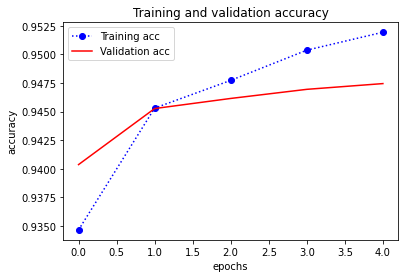

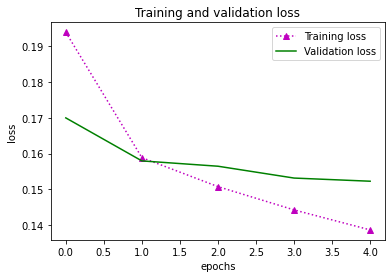

In [86]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'ob:', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc='best')
 
plt.figure()
 
plt.plot(epochs, loss, '^m:', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='best')
 
plt.show()

##### Training loss is decreasing at each epochs and Training accuracy is increasing at each epochs. Validation loss is decreasing too but the gap b/w the training and validation loss and accuracy is on lower side and which means our model perform well on test data. 

### Text_ preprocessing for Test Dataset

In [50]:
%%time
corpus1=[]
for i in range(0,len(df)):
    review=re.sub('[^a-zA-Z]', ' ',str(df_test['comment_text'][i]))  #removing all the special character from the sentences except lower and upper case alphabets
    review.lower() #lowering each sentences
    review.split() #spliting
    
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')] #using stemming so that each word gets some related words that could not be meaningful and we are ignoring the words that are in stopwords.words('english')
    review=''.join(review) #joining
    corpus1.append(review)   #appending the list
corpus1 #test dataset corpus for 'comment_text' which have total 153164 enties. ignore the error here as eventually have tried for appended dataframe df instead of df_test

KeyError: 153164

In [51]:
len(corpus1)

153164

###### Taking vocabulary size and other constrant as same as that of train dataset

In [52]:
#vocabulary size
voc_size=1000

In [53]:
onehot1=[one_hot(words,voc_size) for words in corpus1]
onehot1

[[330,
  177,
  587,
  697,
  250,
  815,
  594,
  51,
  202,
  298,
  442,
  748,
  587,
  748,
  51,
  388,
  351,
  51,
  646,
  291,
  177,
  48,
  537,
  512,
  378,
  878,
  388,
  163,
  51,
  27,
  51,
  994,
  677,
  508,
  587,
  697,
  906,
  884,
  388,
  508,
  388,
  388,
  721,
  721,
  388,
  721,
  388,
  447,
  669,
  28,
  145,
  941,
  372,
  735,
  777,
  702,
  378,
  342,
  163,
  351,
  724,
  801,
  508],
 [555, 796, 370, 463, 65, 399],
 [312, 304, 910, 388, 682],
 [615,
  51,
  482,
  423,
  595,
  372,
  71,
  372,
  110,
  306,
  536,
  735,
  372,
  477,
  555,
  306,
  482,
  520,
  217,
  372,
  71,
  822,
  536,
  306,
  581,
  536,
  372,
  110,
  88,
  48,
  906,
  880,
  51,
  555,
  537,
  345],
 [306, 388, 42, 508, 532, 202],
 [252, 51, 555, 658, 306, 880, 963, 48, 276, 51, 388, 677, 388, 852, 382, 564],
 [994,
  388,
  201,
  826,
  468,
  508,
  250,
  428,
  490,
  388,
  6,
  67,
  615,
  51,
  677,
  145,
  168,
  994,
  946,
  372,
  848,
  47

In [54]:
#embedding representations
sent_length=100
embedded_docs1=pad_sequences(onehot1,padding='pre',maxlen=sent_length)
print(embedded_docs1)

[[  0   0   0 ... 724 801 508]
 [  0   0   0 ... 463  65 399]
 [  0   0   0 ... 910 388 682]
 ...
 [  0   0   0 ... 555 583 990]
 [  0   0   0 ... 760 477 208]
 [  0   0   0 ... 474 280  51]]


In [55]:
#test feature
x_test_final=embedded_docs1

In [77]:
#converting the test feature into array
x_test_final=np.array(x_test_final)

In [78]:
#performance metrics
y_pred=model.predict(x_test_final)

4787/4787 [==============================] - 3656s 764ms/step


In [79]:
y_pred=np.where(y_pred>0.5,1,0) #converting the continuous target into 0 and 1 only

In [92]:
for i in range(10): #it will give expected and predicted classes for first ten features of test dataset
    print('%s => %d (expected %d)\n' % (x_test_final[i].tolist(), y_pred[i], y_final[i]))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 330, 177, 587, 697, 250, 815, 594, 51, 202, 298, 442, 748, 587, 748, 51, 388, 351, 51, 646, 291, 177, 48, 537, 512, 378, 878, 388, 163, 51, 27, 51, 994, 677, 508, 587, 697, 906, 884, 388, 508, 388, 388, 721, 721, 388, 721, 388, 447, 669, 28, 145, 941, 372, 735, 777, 702, 378, 342, 163, 351, 724, 801, 508] => 1 (expected 0)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 555, 796, 370, 463, 65, 399] => 0 (expected 0)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [81]:
#checking the predictions
y_pred

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [1]])

### Performance Metrix

In [82]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [83]:
accuracy_score(y_final[0:153164],y_pred) #testing accuracy

0.7980857120472173

In [84]:
confusion_matrix(y_final[0:153164],y_pred)

array([[120365,  18126],
       [ 12800,   1873]], dtype=int64)

In [85]:
print(classification_report(y_final[0:153164],y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89    138491
           1       0.09      0.13      0.11     14673

    accuracy                           0.80    153164
   macro avg       0.50      0.50      0.50    153164
weighted avg       0.83      0.80      0.81    153164

